In [1]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_prev = pd.read_csv('Data/Employee_Attrition.csv')

In [3]:
data_prev.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data_prev.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data_prev.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
data = data_prev.select_dtypes(include = 'int64')

In [7]:
data.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [8]:
data['Attrition'] = data_prev['Attrition']

In [9]:
data.dtypes

Age                          int64
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                   object
dtype: object

In [10]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [11]:
data.head(90)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,...,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,56,1400,7,3,1,112,4,49,1,3,...,80,0,37,3,2,6,4,0,2,0
86,23,541,2,1,1,113,3,62,3,1,...,80,1,3,3,3,0,0,0,0,0
87,51,432,9,4,1,116,4,96,3,1,...,80,2,10,4,3,4,2,0,3,0
88,30,288,2,3,1,117,3,99,2,2,...,80,3,11,3,3,11,10,10,8,0


In [12]:
data.isnull().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

In [17]:
data = data.drop('EmployeeCount', 'StandardHours', axis = 1)

In [18]:
data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [19]:
data=data[['DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'Attrition' ]]   # Ordenar el data set data=[X,T,E]  = EN Ml clasico X=X+T

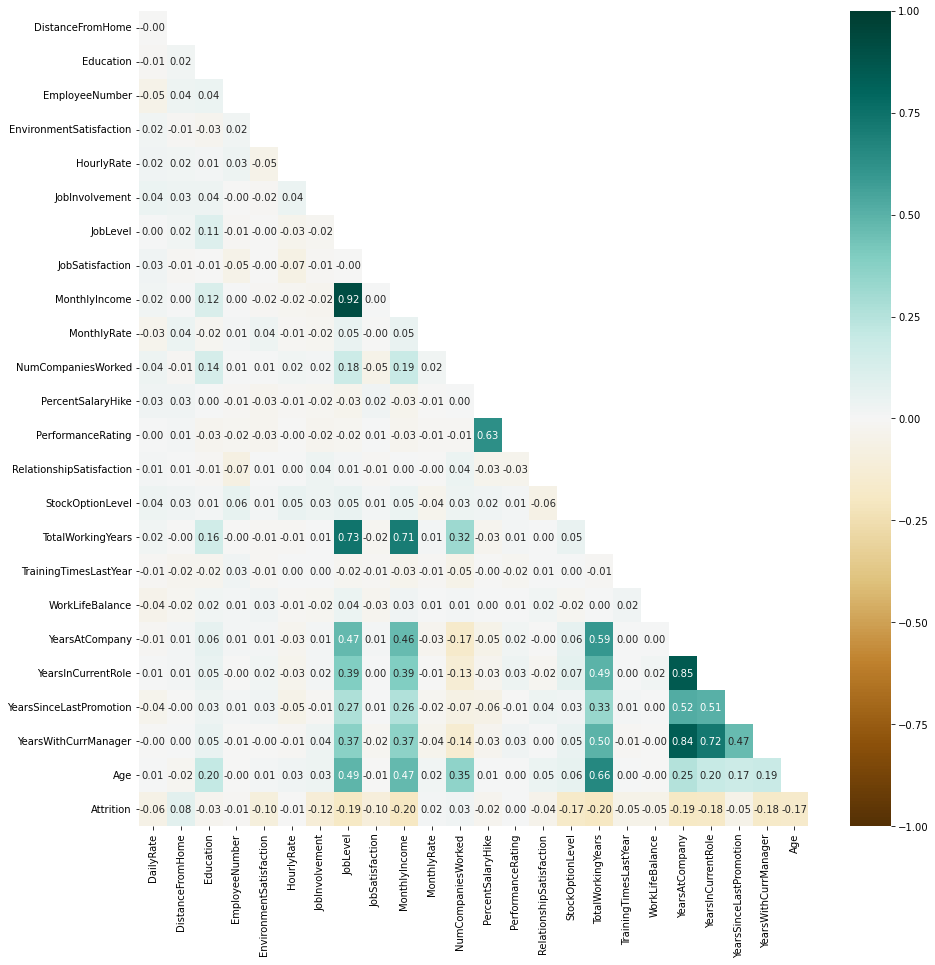

In [20]:
df_corr = data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15,15))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='BrBG',
           vmin=-1, vmax=1, cbar_kws={"shrink": 1})
#    sns.set(font_scale=1)
# yticks
plt.yticks(rotation=0)
plt.show()

In [21]:
pd.crosstab(data.MonthlyIncome,data.Attrition,margins=True)

Attrition,0,1,All
MonthlyIncome,,,
1009,0,1,1
1051,1,0,1
1052,1,0,1
1081,0,1,1
1091,0,1,1
...,...,...,...
19926,1,0,1
19943,1,0,1
19973,1,0,1


In [22]:
100*pd.crosstab(data.MonthlyIncome,data.Attrition,normalize='index').round(4)

Attrition,0,1
MonthlyIncome,,
1009,0.0,100.0
1051,100.0,0.0
1052,100.0,0.0
1081,0.0,100.0
1091,0.0,100.0
...,...,...
19859,0.0,100.0
19926,100.0,0.0
19943,100.0,0.0


In [23]:
data['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [24]:
data.describe()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,36.923810,0.161224
std,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,9.135373,0.367863
min,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,30.000000,0.000000
50%,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,36.000000,0.000000
75%,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,43.000000,0.000000
max,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,60.000000,1.000000


In [25]:
data[(data.Attrition==1)&(data.MonthlyIncome>=6502)]  # Las personas que reincidieron y reciben financiamiento
data[(data.Attrition==1)&(data.MonthlyIncome<6502)]  # Las personas que reincidieron y no reciben financiamiento


,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,Attrition
0,1102,1,2,1,2,94,3,2,4,5993,...,0,8,0,1,6,4,0,5,41,1
2,1373,2,2,4,4,92,2,1,3,2090,...,0,7,3,3,0,0,0,0,37,1
14,103,24,3,19,3,50,2,1,3,2028,...,0,6,4,3,4,2,0,3,28,1
21,1218,9,4,27,3,82,2,1,1,3407,...,0,10,4,3,5,3,0,3,36,1
24,699,6,1,31,2,83,3,1,1,2960,...,0,8,2,3,4,2,1,3,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,1404,17,3,1960,3,32,2,1,4,2367,...,1,6,2,2,4,1,0,3,28,1
1395,754,26,4,1967,1,63,3,2,4,5617,...,0,10,4,3,10,7,0,8,31,1
1438,638,9,3,2023,4,33,3,1,1,1790,...,1,1,3,2,1,0,1,0,23,1
1442,1092,1,4,2027,1,36,3,1,4,4787,...,3,4,3,4,2,2,2,2,29,1


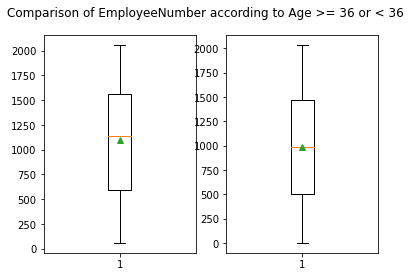

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison of EmployeeNumber according to Age >= 36 or < 36')
ax1.boxplot(data[(data.Attrition==1)&(data.MonthlyIncome>=6502)].EmployeeNumber,showfliers=False,showmeans=True)
ax2.boxplot(data[(data.Attrition==1)&(data.MonthlyIncome<6502)].EmployeeNumber,showfliers=False,showmeans=True)
plt.show()

In [27]:
dd=data[(data.Attrition==1)&(data.MonthlyIncome>=6502)]
dd0=data[(data.Attrition==1)&(data.MonthlyIncome<6502)]

In [28]:
print(dd.EmployeeNumber.mean())
print(dd0.EmployeeNumber.mean())

1100.8461538461538
984.9081081081081


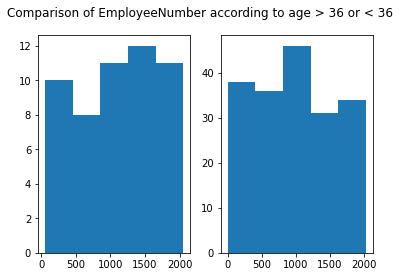

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison of EmployeeNumber according to age > 36 or < 36')
ax1.hist(data[(data.Attrition==1)&(data.MonthlyIncome>=6502)].EmployeeNumber,bins=5)
ax2.hist(data[(data.Attrition==1)&(data.MonthlyIncome<6502)].EmployeeNumber,bins=5)
plt.show()

In [30]:
data_sample=data.sample(6,random_state=123)

In [31]:
data_sample

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,Attrition
42,1357,25,3,55,1,48,1,1,3,2293,...,0,1,2,2,1,0,0,1,26,1
76,776,1,4,100,3,32,2,2,1,4312,...,0,16,2,3,15,13,2,8,35,0
1380,682,18,4,1945,2,71,3,2,1,5561,...,1,6,2,1,5,3,0,4,35,0
252,665,15,3,346,3,60,3,1,4,2340,...,0,6,1,3,6,5,1,5,29,0
388,201,1,4,517,2,95,3,1,1,2576,...,1,8,5,3,5,2,1,2,42,0
1206,786,7,3,1693,4,76,3,1,4,2570,...,0,7,5,3,7,7,5,7,26,0


[]

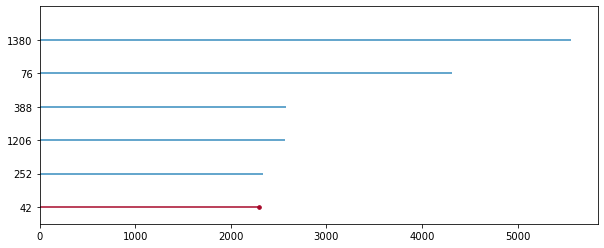

In [32]:
plt.figure(figsize=(10,4))
time = data_sample.MonthlyIncome
event = data_sample.Attrition
lifelines.plotting.plot_lifetimes(durations=time, event_observed=event)
plt.plot()

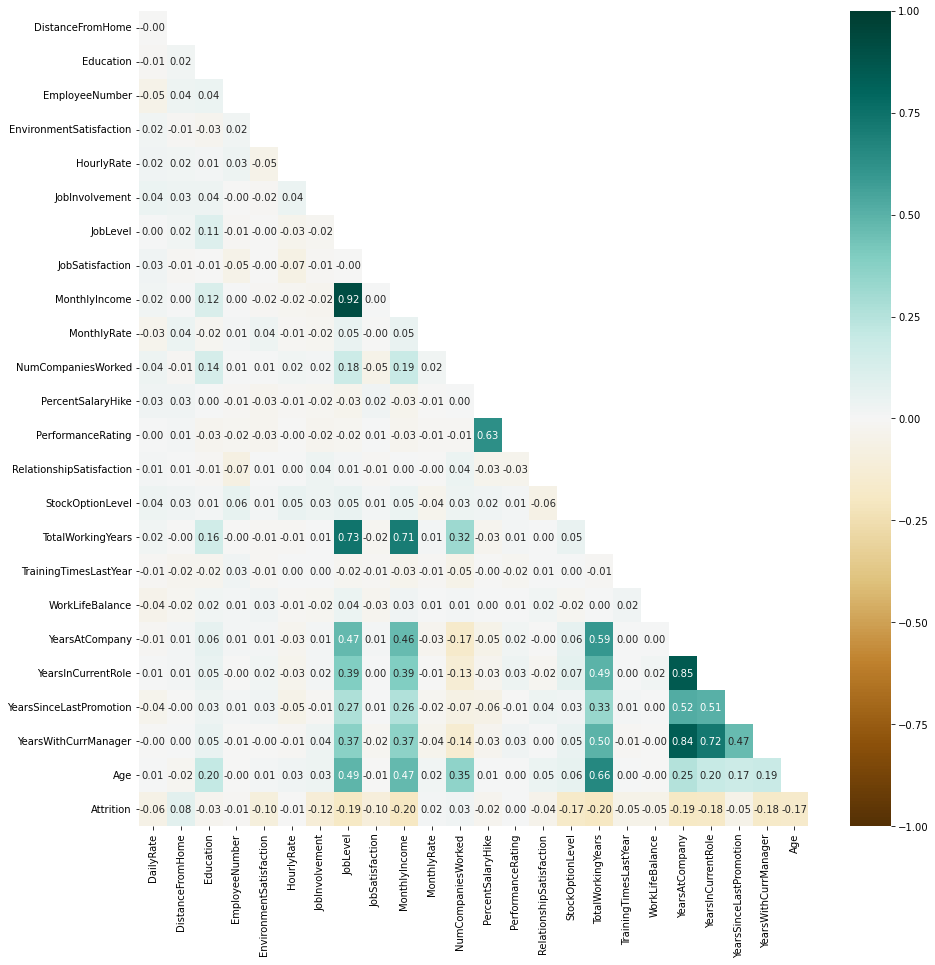

In [33]:
df_corr = data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15,15))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='BrBG',
           vmin=-1, vmax=1, cbar_kws={"shrink": 1})
#    sns.set(font_scale=1)
# yticks
plt.yticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Survival Curve')

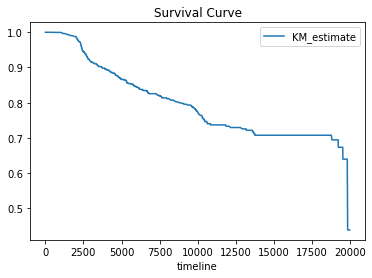

In [34]:
kmf = lifelines.KaplanMeierFitter()

T = data.MonthlyIncome
E = data.Attrition
kmf.fit(T, E)
kmf.survival_function_.plot()
plt.title('Survival Curve')
#plt.ylim(0,1);

<AxesSubplot:xlabel='timeline'>

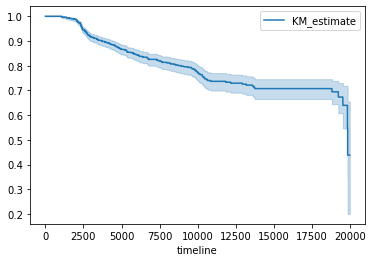

In [35]:
kmf.plot()

In [36]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1470,1470
1009.0,1,1,0,0,1470
1051.0,1,0,1,0,1469
1052.0,1,0,1,0,1468
1081.0,1,1,0,0,1467
...,...,...,...,...,...
19859.0,1,1,0,0,5
19926.0,1,0,1,0,4
19943.0,1,0,1,0,3


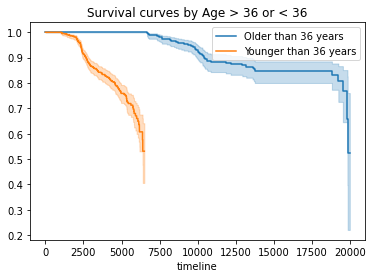

In [41]:
# H0: S1(t)=S2(t)
# Ha: S1(t)<>S2(t)

ax = plt.subplot(111)

opc = (data["MonthlyIncome"] >= 6502 ) 
opc1 = (data["MonthlyIncome"] < 6502 )


kmf.fit(T[opc], event_observed=E[opc], label="Older than 36 years")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[opc1], event_observed=E[opc1], label="Younger than 36 years")
kmf.plot_survival_function(ax=ax)

plt.title("Survival curves by Age > 36 or < 36");

In [42]:
from lifelines.statistics import logrank_test

In [43]:
results = logrank_test(T[opc], T[opc1], E[opc], E[opc1], alpha=.95)


In [44]:
results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         191.58 <0.005    142.32

## Cox Proportional Hazards Regression

In [46]:
data.head()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,Attrition
0,1102,1,2,1,2,94,3,2,4,5993,...,0,8,0,1,6,4,0,5,41,1
1,279,8,1,2,3,61,2,2,2,5130,...,1,10,3,3,10,7,1,7,49,0
2,1373,2,2,4,4,92,2,1,3,2090,...,0,7,3,3,0,0,0,0,37,1
3,1392,3,4,5,4,56,3,1,3,2909,...,0,8,3,3,8,7,3,0,33,0
4,591,2,1,7,1,40,3,1,2,3468,...,1,6,3,3,2,2,2,2,27,0


In [57]:
from lifelines import CoxPHFitter

In [48]:
cph = CoxPHFitter()
cph.fit(data, duration_col='MonthlyIncome', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [45]:
data.describe()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,36.923810,0.161224
std,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,9.135373,0.367863
min,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,30.000000,0.000000
50%,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,36.000000,0.000000
75%,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,43.000000,0.000000
max,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,60.000000,1.000000


In [49]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'MonthlyIncome'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1229.68
         time fit was run = 2023-12-17 15:35:29 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
DailyRate                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DistanceFromHome           0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
Education                  0.01       1.01       0.07            -0.12             0.13                 0.89                 1.14
EmployeeNumber            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
EnvironmentSatisfaction   -0.17       0.84       0.06            -0.29            -0.05                 0.75                 0.95
HourlyRate                -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
JobInvolvement            -0.34       0.71       0.09            -0.51            -0.17                 0.60                 0.84
JobLevel                  -2.77       0.06       0.22            -3.19            -2.35                 0.04                 0.10
JobSatisfaction           -0.22       0.80       0.06            -0.34            -0.10                 0.71                 0.90
MonthlyRate               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
NumCompaniesWorked         0.07       1.08       0.03             0.02             0.13                 1.02                 1.13
PercentSalaryHike         -0.05       0.95       0.03            -0.10             0.01                 0.90                 1.01
PerformanceRating          0.46       1.58       0.30            -0.12             1.04                 0.88                 2.83
RelationshipSatisfaction  -0.09       0.92       0.06            -0.21             0.03                 0.81                 1.03
StockOptionLevel          -0.35       0.70       0.09            -0.54            -0.17                 0.59                 0.84
TotalWorkingYears         -0.07       0.93       0.02            -0.12            -0.02                 0.89                 0.98
TrainingTimesLastYear     -0.10       0.90       0.05            -0.20            -0.00                 0.82                 1.00
WorkLifeBalance           -0.20       0.82       0.09            -0.37            -0.03                 0.69                 0.97
YearsAtCompany             0.08       1.09       0.03             0.02             0.15                 1.02                 1.16
YearsInCurrentRole        -0.14       0.87       0.04            -0.21            -0.07                 0.81                 0.94
YearsSinceLastPromotion    0.11       1.11       0.03             0.04             0.17                 1.04                 1.19
YearsWithCurrManager      -0.11       0.89       0.04            -0.19            -0.04                 0.83                 0.97
Age                       -0.02       0.98       0.01            -0.04            -0.00                 0.96                 1.00

                           cmp to      z      p   -log2(p)
covariate                                                 
DailyRate                    0.00  -1.55   0.12       3.03
DistanceFromHome             0.00   3.74 <0.005      12.38
Education                    0.00   0.11   0.91       0.13
EmployeeNumber               0.00  -1.43   0.15       2.72
EnvironmentSatisfacti

<AxesSubplot:xlabel='log(HR) (95% CI)'>

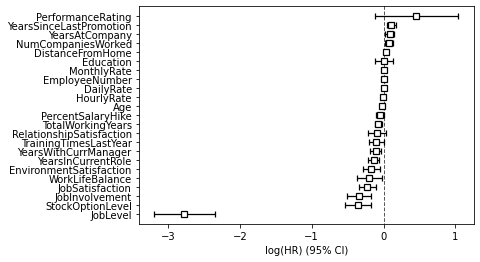

In [50]:
cph.plot()

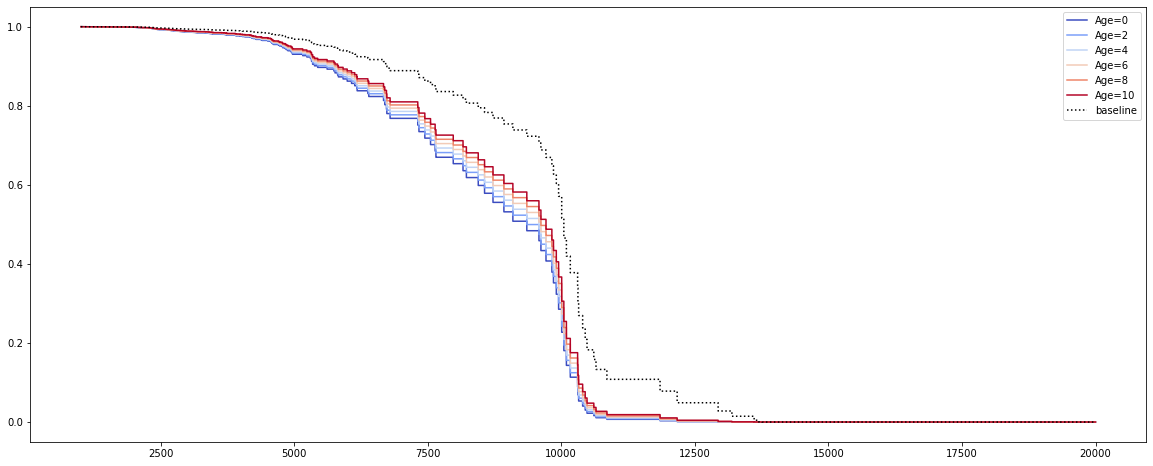

In [55]:
cph.plot_partial_effects_on_outcome(covariates='Age', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm',figsize=(20,8))
plt.show()

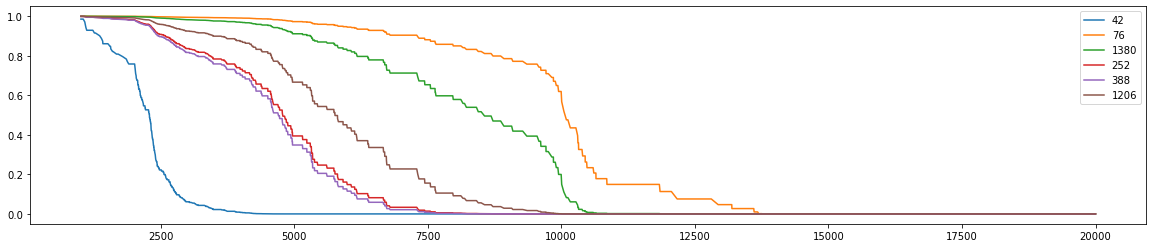

In [56]:
plt.figure(figsize=(20,4))
surv_func = cph.predict_survival_function(data_sample)
exp_lifetime = cph.predict_expectation(data_sample)
plt.plot(surv_func)
plt.legend(surv_func.columns)
plt.show()